In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sample_size = 200

In [52]:
data = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/rivers.csv', index_col=0)

This data set (*Lengths of Major North American Rivers*) was obtained from [this page](https://vincentarelbundock.github.io/Rdatasets/datasets.html).

In [53]:
data.head()

,dat
1,735
2,320
3,325
4,392
5,524


In [54]:
original_sample = data['dat'].values

In [55]:
num_observations = original_sample.shape[0]

In [56]:
num_bootstrap_samples = 10000

In [57]:
np.random.seed(1111)

In [58]:
bootstrap_samples = np.random.choice(original_sample, size=(num_bootstrap_samples, num_observations), replace=True)

In [59]:
bootstrap_medians = np.median(bootstrap_samples, axis=1)

In [60]:
stderr_medians = bootstrap_medians.std()

In [61]:
print('Std. deviation of the medians: {:.6f}'.format(stderr_medians))

Std. deviation of the medians: 26.310530


In [62]:
print('Quantiles:\n\t  2.5th: {}\n\t 97.5th: {}'.format(*np.quantile(bootstrap_medians, q=[0.025, 0.975])))

Quantiles:
	  2.5th: 380.0
	 97.5th: 500.0


In [64]:
plt.style.use('seaborn-whitegrid')

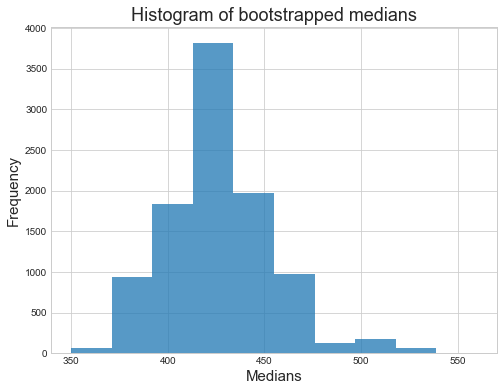

In [76]:
fig, ax = plt.subplots(figsize=(8,6))

ax.set_title('Histogram of bootstrapped medians', fontsize=18)

ax.hist(bootstrap_medians, bins=10, alpha=0.75)
ax.set_xlabel('Medians', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)

fig.savefig('bootstrap-medians.png')